<a href="https://colab.research.google.com/github/mehrankhosrojerdi/Diffusion_model/blob/main/annni_model_rbf_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install numpy
! python -m pip install scipy
! pip install numba
! pip install cytoolz
! pip install "git+https://github.com/tqdm/tqdm.git@devel#egg=tqdm"
! pip install psutil
! pip install cotengra
! pip installautoray
! pip install --no-deps -U git+https://github.com/jcmgray/quimb.git@main


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.1 MB/s eta 0:00:00
  Cloning https://github.com/tqdm/tqdm.git (to revision devel) to /tmp/pip-install-fg_4hkck/tqdm_f7c6cfad4250462a9136332541a9daaa
  Running command git clone --filter=blob:none --quiet https://github.com/tqdm/tqdm.git /tmp/pip-install-fg_4hkck/tqdm_f7c6cfad4250462a9136332541a9daaa
  Running command git checkout -b devel --track origin/devel
  Switched to a new branch 'devel'
  Branch 'devel' set up to track remote branch 'devel' from 'origin'.
  Resolved https://github.com/tqdm/tqdm.git to commit 6ce50bedb3c525f762258fb0701aacae15515f4d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tqdm: filename=tqdm-4.66.1.dev2+g6ce50be-py3-none-any.whl size=78482 sha256=2faed77e4a364cf7c9b1d95964fa78d07f6b390501c28844f10c202569983e26
  Stored in directory: /tmp/pip-ephem-wheel-cache-x7hodwhr/wheels/58/37/2e/a68b55b

In [ ]:
import numpy as np
import quimb as qu
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

/usr/local/lib/python3.10/dist-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


<ipython-input-74-f185cdb5748f>:2: RuntimeWarning: divide by zero encountered in divide
  y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )
<ipython-input-74-f185cdb5748f>:2: RuntimeWarning: invalid value encountered in multiply
  y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )
<ipython-input-74-f185cdb5748f>:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )


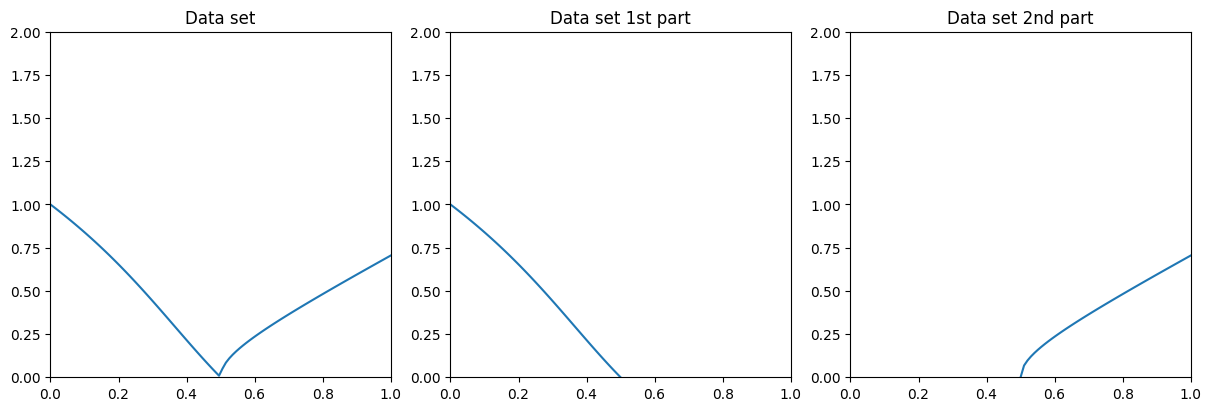

In [ ]:
x = np.linspace(0.001,1,100)
y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )

x1 = np.linspace(0.001, 0.5, 50)
def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
y1 = np.array(hI_k(x1))

x2 = np.linspace(0.5, 1, 50)
def hC_k(x):
  return (1.05*(np.sqrt((x-0.5)*(x-0.1))))
y2 = np.array(hC_k(x2))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(12, 4))
ax1.plot(x,y)
ax1.set_ylim(0.0, 2.0)
ax1.set_xlim(0.0, 1.0)
ax2.plot(x1,y1)
ax2.set_ylim(0.0, 2.0)
ax2.set_xlim(0.0, 1.0)
ax3.plot(x2,y2)
ax3.set_ylim(0.0, 2.0)
ax3.set_xlim(0.0, 1.0)
ax1.set_title("Data set");  ax2.set_title("Data set 1st part");  ax3.set_title("Data set 2nd part")
plt.show()

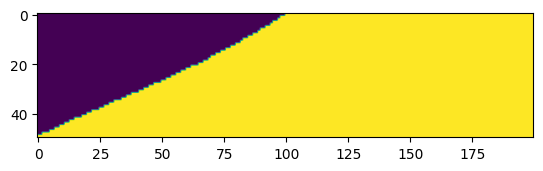

In [ ]:
x1 = np.linspace(0.001, 0.5, 50)
x2 = np.linspace(0.001, 2, 200)

def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))

lst_f = []

for _ in hI_k(x1):
  for j in x2:
    if j< _:
      f = -1
    else:
      f = 0
    lst_f.append(f)
array_form = np.array(lst_f)
re_array_form = array_form.reshape(x1.shape[0],x2.shape[0])
plt.imshow(re_array_form)
plt.show()

In [ ]:
# dataset
x1 = np.linspace(0.001,0.5,50)
x2 = np.linspace(0.001,2,200)
hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))



lst_f = []
for i in x1:
  for j in x2:
    if j < hI_k[int(x1[i])]:
        f = -1
    else:
        f = 0
    lst_f.append(f)
array_form = np.array(lst_f)
re_array_form = array_form.reshape(x1.shape[0],x2.shape[0])
plt.imshow(re_array_form)
plt.show()

IndexError: ignored

<ipython-input-6-19c88083a15f>:4: RuntimeWarning: divide by zero encountered in divide
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-6-19c88083a15f>:4: RuntimeWarning: invalid value encountered in multiply
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-6-19c88083a15f>:5: RuntimeWarning: invalid value encountered in sqrt
  hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))


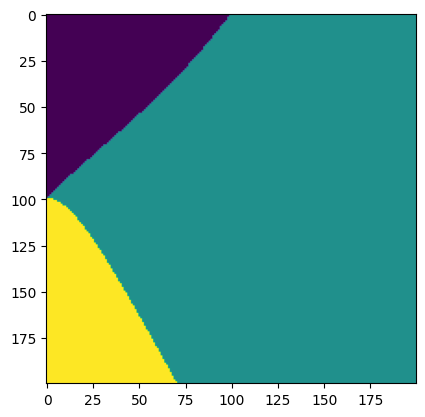

In [ ]:
# dataset
x1 = np.linspace(0.001,1,200)
x2 = np.linspace(0.001,2,200)
hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))
lst_f = []
for i in x1:
    if i < 0.5:
        for j in x2:
            if j <= hI_k[int(i * x1.shape[0])]:
                f = -1
            else:
                f = 0
            lst_f.append(f)
    else:
        for j in x2:
            if j <= hC_k[int((i - 0.001) * x1.shape[0])]:
                f = 1
            else:
                f = 0
            lst_f.append(f)

array_form = np.array(lst_f)
re_array_form = array_form.reshape(x2.shape[0],x1.shape[0])
plt.imshow(re_array_form)
plt.show()

Example 3: make a model by rbf kernel

In [ ]:
# dataset
x1 = np.linspace(0.001,1,200)
x2 = np.linspace(0.001,2,200)
lst_x =[]
for i in x1:
  for j in x2:
    lst_x.append(i)
    lst_x.append(j)

x = np.array(lst_x).reshape(40000,2)
y = np.array(lst_f)

In [ ]:
# svc model
clf= svm.SVC(kernel="rbf", gamma=0.7, C=10)

In [ ]:
# fitting
clf.fit(x, y)

SVC(C=10, gamma=0.7)

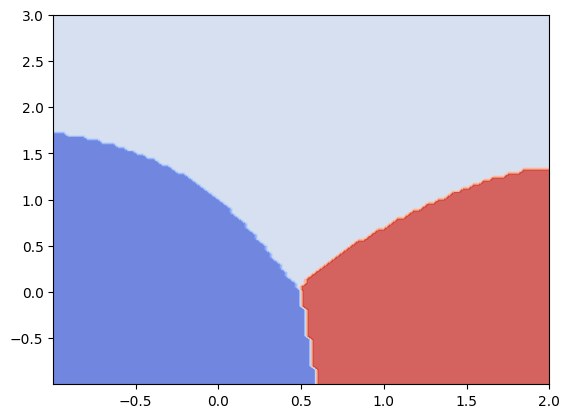

In [ ]:
# displying
isp = DecisionBoundaryDisplay.from_estimator(
    clf,
    x,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
)